# Decision Tree Classification

## Home Assignment - Liver Disease Classification

**BONUS ASSIGNMENT - 6 marks**

The dataset is classification of patients having liver disease. We will classify this data using Decision Tree.

Perform the following operations:

#### 1. Plot the following:
- Number of cases having liver disease and no disease  
- Number of cases having liver disease and no disease gender wise, two separate graphs  
- Heat map of Correlation Matrix of the entire dataset. Are there are any interconnected features looking at the matrix?  
- A pairwise scatter plot of all the features, separated by records having disease and not having diseases.

#### 2. If there is a positive or a negative correlation between any features, remove either of them from the dataset. If there are any NaNs in the dataset, fill them up as well with a suitable method. Convert any string categories into numeric.

#### 3. Split your data manually into training and testing. Make sure you get an equal distribution of both the classes in the training dataset.

#### 4. Perform Decision Tree classification with entropy gain with a depth of 3 & 4. Plot the decision trees for all the models.

#### 5. Compare your output with the following metrics:
- Classification Report, Confusion Matrix, Decision Tree.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('indian_liver_patient.csv')
df.head()
df
df['Dataset'].unique()
male = df[(df["Gender"] =='Male')] 
female = df[(df["Gender"] =='Female')]
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### 1. Plot the following:

Number of cases having liver disease and no disease

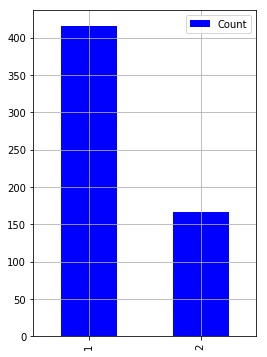

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,6))
df['Dataset'].value_counts().sort_index().plot(kind='bar',color='b',label='Count')
plt.legend()
plt.grid()

- Number of cases having liver disease and no disease gender wise, two separate graphs

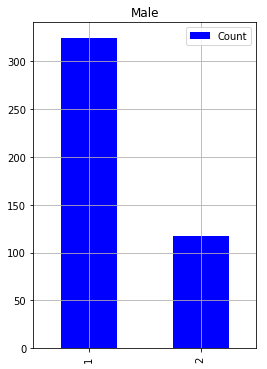

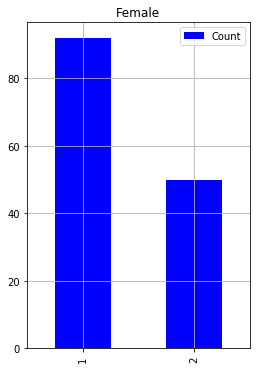

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,6))
male['Dataset'].value_counts().sort_index().plot(kind='bar',color='b',label='Count')
plt.title('Male')
plt.legend()
plt.grid()

plt.figure(figsize=(4,6))
female['Dataset'].value_counts().sort_index().plot(kind='bar',color='b',label='Count')
plt.title('Female')
plt.legend()
plt.grid()

- Heat map of Correlation Matrix of the entire dataset. Are there are any interconnected features looking at the matrix?

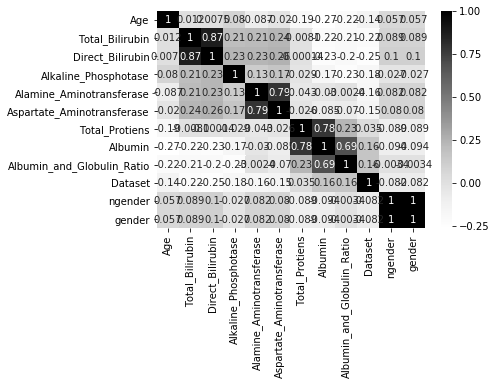

In [84]:
#df.corr()
import seaborn as sb
sb.heatmap(df.corr(),annot = True , cmap ='Greys')

- A pairwise scatter plot of all the features, separated by records having disease and not having diseases

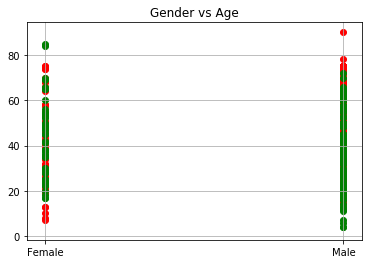

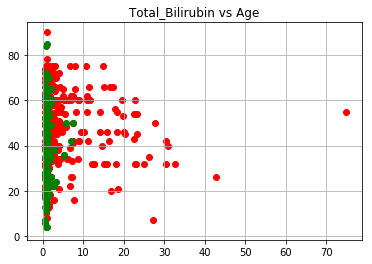

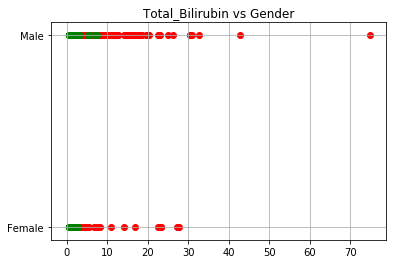

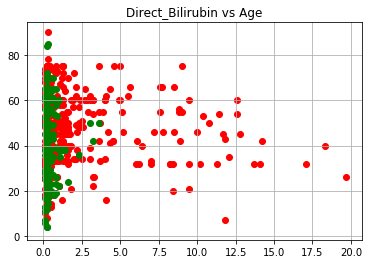

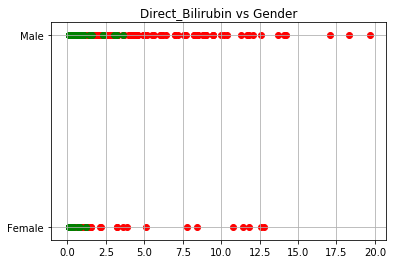

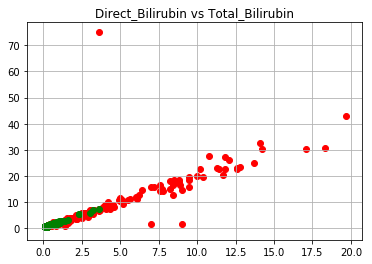

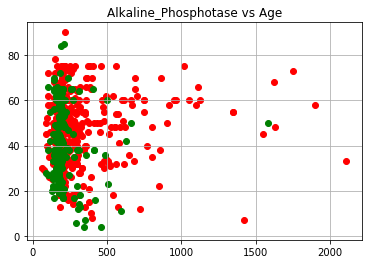

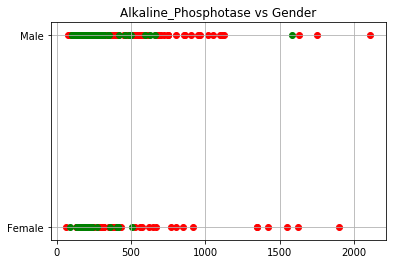

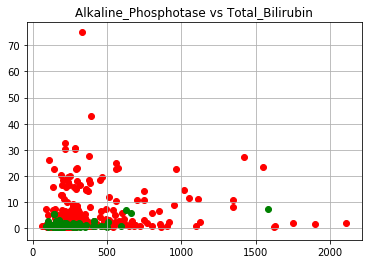

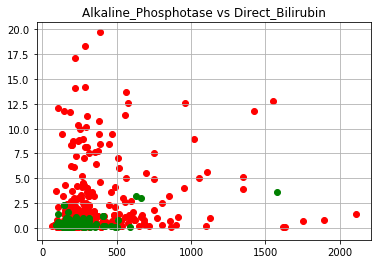

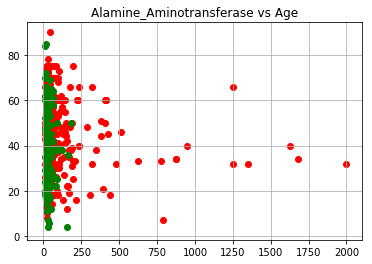

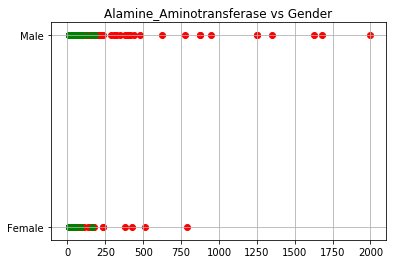

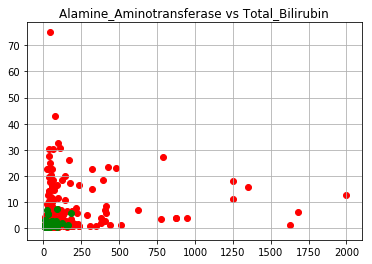

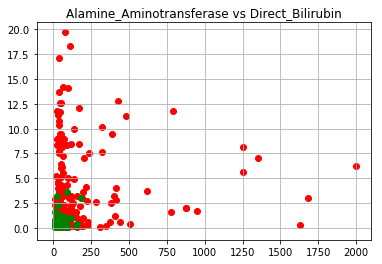

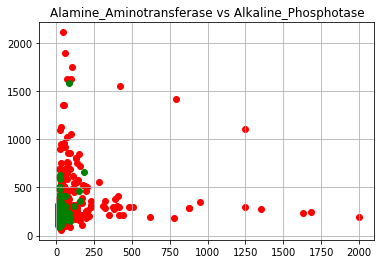

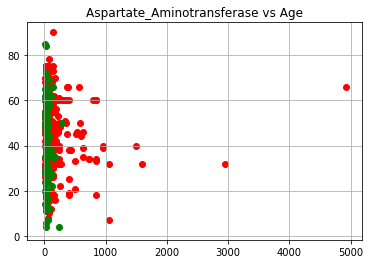

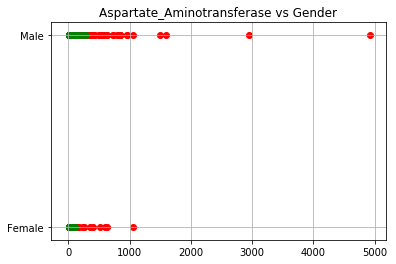

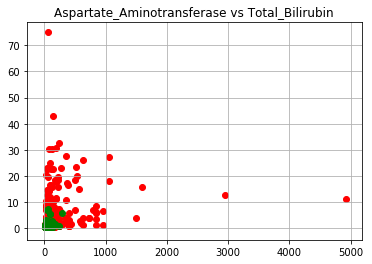

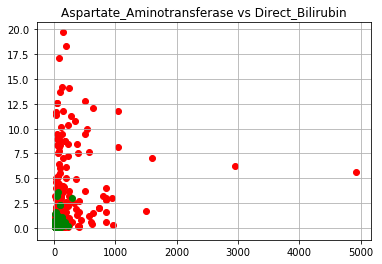

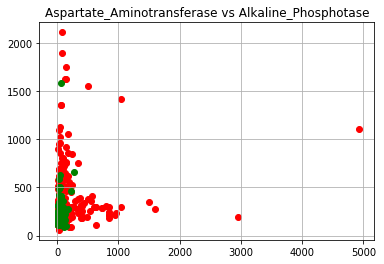

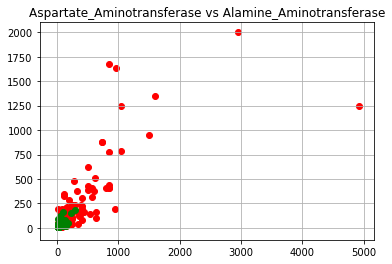

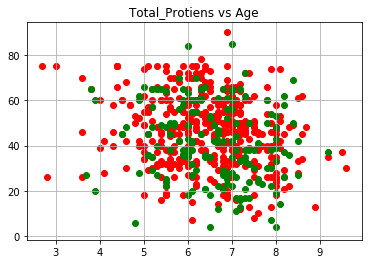

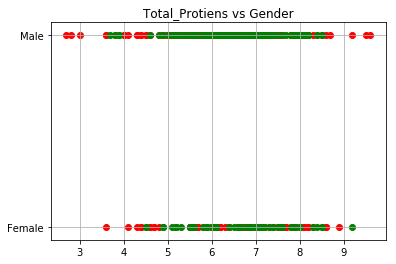

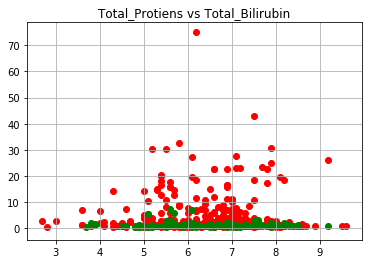

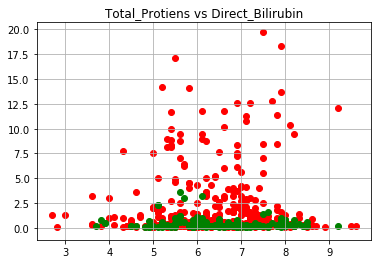

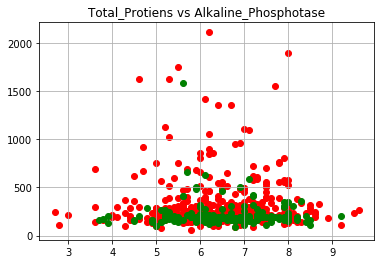

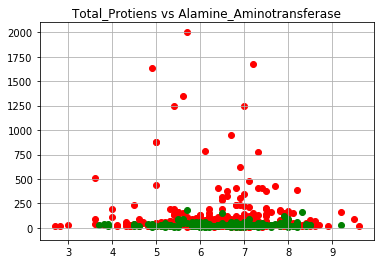

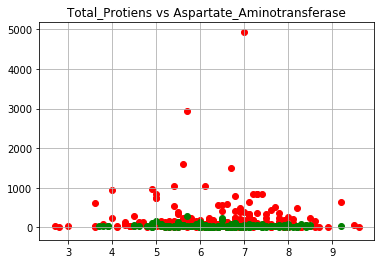

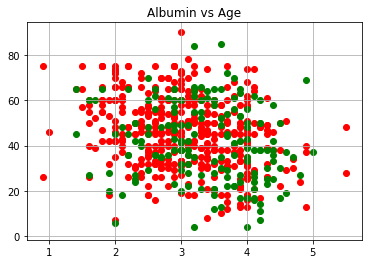

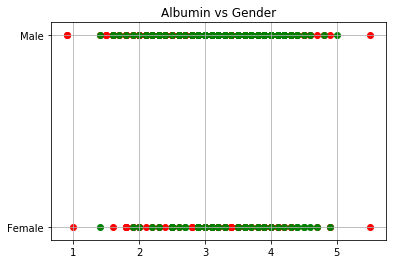

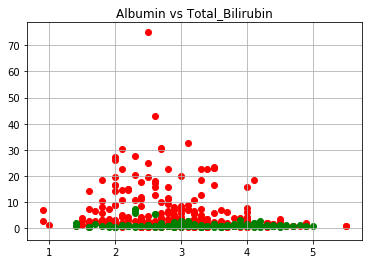

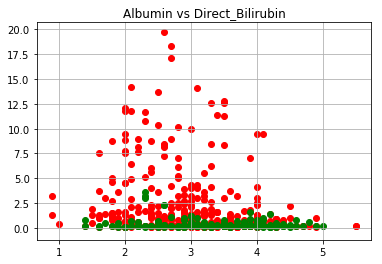

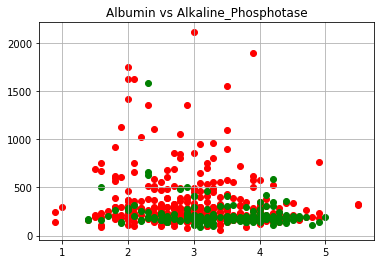

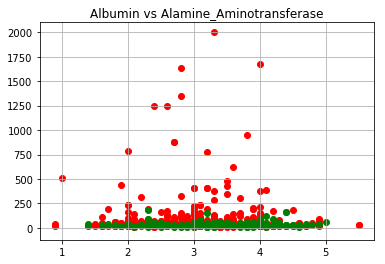

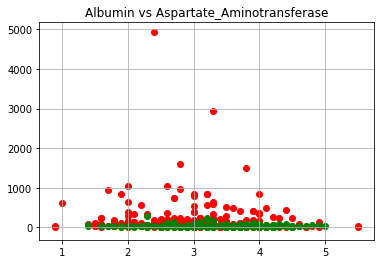

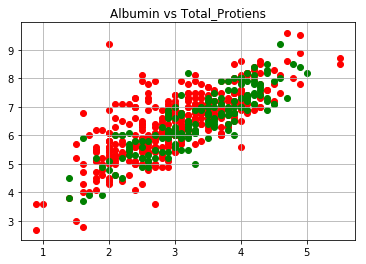

In [85]:
df.columns
dis=df[df['Dataset']==1]
no_dis=df[df['Dataset']==2]
for i in range(9):
    for j in range(i+1):
        if i!=j:
            plt.scatter(dis[df.columns[i]], dis[df.columns[j]],color='r',label='Disease')
            plt.scatter(no_dis[df.columns[i]], no_dis[df.columns[j]],color='g',label='No disease')
            plt.title("{0} vs {1}".format(df.columns[i],df.columns[j]))
            plt.grid()
            plt.show()

### 2. If there is a positive or a negative correlation between any features, Select them. If there are any NaNs in the dataset, fill them up as well with a suitable method. Convert any string categories into numeric

In [69]:
df.fillna(0)
genders = list(df['Gender'].unique())
num=list(range(len(genders)))
print(genders)
print(num)
mapping = dict(zip(genders,num))
print(mapping)
df['ngender']=df['Gender'].apply(lambda x:mapping[x])
df.head()

['Female', 'Male']
[0, 1]
{'Female': 0, 'Male': 1}


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,ngender
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


### 3. Split your data manually into training and testing. Make sure you get an equal distribution of both the classes in the training dataset.

In [87]:
dis=df[df['Dataset']==1]
no_dis=df[df['Dataset']==2]
x_train, x_test, y_train, y_test=train_test_split(dis[['Total_Bilirubin','Direct_Bilirubin']],dis['Dataset'],test_size=0.2,random_state=200)
x_train1, x_test1, y_train1, y_test1=train_test_split(no_dis[['Total_Bilirubin','Direct_Bilirubin']],no_dis['Dataset'],test_size=0.2,random_state=200)

x_train_concat1=pd.concat([x_train,x_train1])
x_test_concat2=pd.concat([x_test,x_test1])
y_train_concat1=pd.concat([y_train,y_train1])
y_test_concat2=pd.concat([y_test,y_test1])

### 4. Perform Decision Tree classification with entropy gain with a depth of 3 & 4. Plot the decision trees for all the models

In [88]:
# Depth 3
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
decisiontree = DecisionTreeClassifier(criterion ='entropy',max_depth = 3)
obtained_tree = decisiontree.fit(x_train_concat1,y_train_concat1)
print("Extracted Classes:", decisiontree.classes_)



#predicted output
predictions = obtained_tree.predict(df[['Total_Bilirubin','Direct_Bilirubin']])
print(predictions.tolist())
#actual output
print(df['Dataset'].tolist())
print("Confusion Matrix:")
print(confusion_matrix(df['Dataset'],predictions))

Extracted Classes: [1 2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,

              precision    recall  f1-score   support

           1       0.74      0.92      0.82       416
           2       0.51      0.22      0.30       167

    accuracy                           0.72       583
   macro avg       0.63      0.57      0.56       583
weighted avg       0.68      0.72      0.67       583



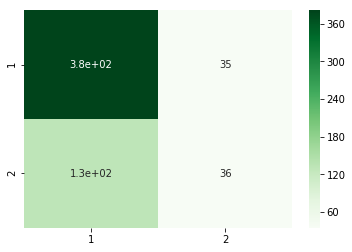

In [80]:
import seaborn
seaborn.heatmap(confusion_matrix(df['Dataset'],predictions),annot=True, cmap="Greens",
               xticklabels=decisiontree.classes_,yticklabels=decisiontree.classes_)

print(classification_report(df['Dataset'],predictions))

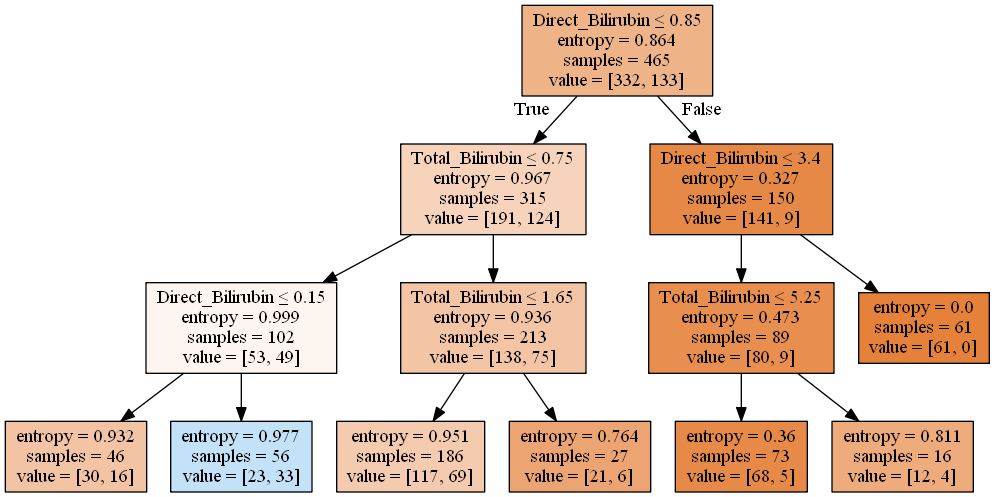

In [73]:
import os
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
os.environ["PATH"]+= os.pathsep +'C:\\Program Files (x86)\\Graphviz2.38\\bin'
DecisionTreeImg = StringIO()
export_graphviz(obtained_tree, out_file=DecisionTreeImg,
               filled=True,
               feature_names=['Total_Bilirubin','Direct_Bilirubin'],special_characters=True)
graph = pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())

In [38]:
# Depth 4
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


decisiontree = DecisionTreeClassifier(criterion ='entropy',max_depth = 4)
obtained_tree = decisiontree.fit(x_train_concat1,y_train_concat1)
print("Extracted Classes:", decisiontree.classes_)


#predicted output
predictions = obtained_tree.predict(df[['Total_Bilirubin','Direct_Bilirubin']])
print(predictions.tolist())
#actual output
print(df['Dataset'].tolist())
print(confusion_matrix(df['Dataset'],predictions))

Extracted Classes: [1 2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,

# 5. Compare your output with the following metrics:
- Classification Report, Confusion Matrix, Decision Tree.

              precision    recall  f1-score   support

           1       0.74      0.92      0.82       416
           2       0.51      0.22      0.30       167

    accuracy                           0.72       583
   macro avg       0.63      0.57      0.56       583
weighted avg       0.68      0.72      0.67       583



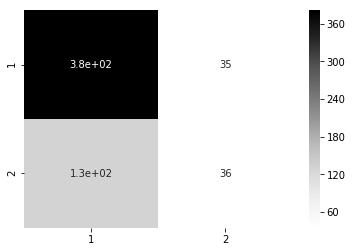

In [78]:
import seaborn
seaborn.heatmap(confusion_matrix(df['Dataset'],predictions),annot=True, cmap="Greys",
               xticklabels=decisiontree.classes_,yticklabels=decisiontree.classes_)
print(classification_report(df['Dataset'],predictions))

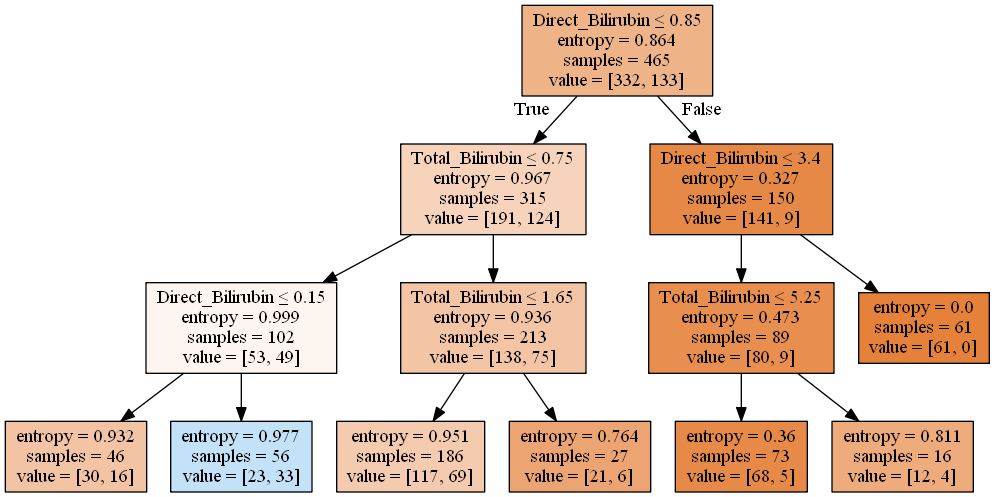

In [79]:
import os
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

os.environ["PATH"]+= os.pathsep +'C:\\Program Files (x86)\\Graphviz2.38\\bin'
DecisionTreeImg = StringIO()
export_graphviz(obtained_tree, out_file=DecisionTreeImg,
               filled=True,
               feature_names=['Total_Bilirubin','Direct_Bilirubin'],special_characters=True)
graph = pydotplus.graph_from_dot_data(DecisionTreeImg.getvalue())
Image(graph.create_png())